# ENRON fraud detection
Identify persons of interest (POIs) from ENRON financial and email data (educational purpose) 

In [1]:
# Import some modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import sys
import pickle

sys.path.append("../tools/")

from feature_format import featureFormat, targetFeatureSplit
from tester import dump_classifier_and_data

In [2]:
# Path to images and data
IMAGES = '../images/'
DATA   = '../data/'

In [3]:
### Task 1: Select what features you'll use.
### features_list is a list of strings, each of which is a feature name.
### The first feature must be "poi".

#features_list = ['poi','salary'] # You will need to use more features

In [4]:
### Load the dictionary containing the dataset
with open("../data/final_project_dataset.pkl", "r") as data_file:
    data_dict = pickle.load(data_file)

In [5]:
columns = ['poi',
           'salary', 'bonus', 'long_term_incentive', 'deferred_income', 'deferral_payments', 'loan_advances', 'other', 'expenses', 'director_fees', 'total_payments', 
           'exercised_stock_options', 'restricted_stock', 'restricted_stock_deferred', 'total_stock_value',
           'email_address', 'to_messages', 'from_messages', 'from_this_person_to_poi', 'from_poi_to_this_person', 'shared_receipt_with_poi'] 

In [6]:
data_Frame = pd.DataFrame(data_dict).transpose()
data_Frame = data_Frame[ columns ]

In [7]:
# Replace 'NaN' string with numpy.NaN
# Change POI from boolean to integer (poi: 1, no_poi: 0)
def repl_NaN(val):
    if val == 'NaN':
        val = np.NaN
    if isinstance(val, bool):
        val = int(val)
    return val

data_Frame = data_Frame.applymap(repl_NaN)

In [8]:
data_Frame.head()

,poi,salary,bonus,long_term_incentive,deferred_income,deferral_payments,loan_advances,other,expenses,director_fees,...,exercised_stock_options,restricted_stock,restricted_stock_deferred,total_stock_value,email_address,to_messages,from_messages,from_this_person_to_poi,from_poi_to_this_person,shared_receipt_with_poi
ALLEN PHILLIP K,0,201955.0,4175000.0,304805.0,-3081055.0,2869717.0,NaN,152.0,13868.0,NaN,...,1729541.0,126027.0,-126027.0,1729541.0,phillip.allen@enron.com,2902.0,2195.0,65.0,47.0,1407.0
BADUM JAMES P,0,NaN,NaN,NaN,NaN,178980.0,NaN,NaN,3486.0,NaN,...,257817.0,NaN,NaN,257817.0,NaN,NaN,NaN,NaN,NaN,NaN
BANNANTINE JAMES M,0,477.0,NaN,NaN,-5104.0,NaN,NaN,864523.0,56301.0,NaN,...,4046157.0,1757552.0,-560222.0,5243487.0,james.bannantine@enron.com,566.0,29.0,0.0,39.0,465.0
BAXTER JOHN C,0,267102.0,1200000.0,1586055.0,-1386055.0,1295738.0,NaN,2660303.0,11200.0,NaN,...,6680544.0,3942714.0,NaN,10623258.0,NaN,NaN,NaN,NaN,NaN,NaN
BAY FRANKLIN R,0,239671.0,400000.0,NaN,-201641.0,260455.0,NaN,69.0,129142.0,NaN,...,NaN,145796.0,-82782.0,63014.0,frank.bay@enron.com,NaN,NaN,NaN,NaN,NaN


In [9]:
data_Frame.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
poi,146.0,1.232877e-01,3.298989e-01,0.0,0.00,0.0,0.00,1.0
salary,95.0,5.621943e+05,2.716369e+06,477.0,211816.00,259996.0,312117.00,26704229.0
bonus,82.0,2.374235e+06,1.071333e+07,70000.0,431250.00,769375.0,1200000.00,97343619.0
long_term_incentive,66.0,1.470361e+06,5.942759e+06,69223.0,281250.00,442035.0,938672.00,48521928.0
deferred_income,49.0,-1.140475e+06,4.025406e+06,-27992891.0,-694862.00,-159792.0,-38346.00,-833.0
deferral_payments,39.0,1.642674e+06,5.161930e+06,-102500.0,81573.00,227449.0,1002671.50,32083396.0
loan_advances,4.0,4.196250e+07,4.708321e+07,400000.0,1600000.00,41762500.0,82125000.00,83925000.0
other,93.0,9.190650e+05,4.589253e+06,2.0,1215.00,52382.0,362096.00,42667589.0
expenses,95.0,1.087289e+05,5.335348e+05,148.0,22614.00,46950.0,79952.50,5235198.0
director_fees,17.0,1.668049e+05,3.198914e+05,3285.0,98784.00,108579.0,113784.00,1398517.0


In [10]:
data_Frame.info()

<class 'pandas.core.frame.DataFrame'>
Index: 146 entries, ALLEN PHILLIP K to YEAP SOON
Data columns (total 21 columns):
poi                          146 non-null int64
salary                       95 non-null float64
bonus                        82 non-null float64
long_term_incentive          66 non-null float64
deferred_income              49 non-null float64
deferral_payments            39 non-null float64
loan_advances                4 non-null float64
other                        93 non-null float64
expenses                     95 non-null float64
director_fees                17 non-null float64
total_payments               125 non-null float64
exercised_stock_options      102 non-null float64
restricted_stock             110 non-null float64
restricted_stock_deferred    18 non-null float64
total_stock_value            126 non-null float64
email_address                111 non-null object
to_messages                  86 non-null float64
from_messages                86 non-null floa

In [11]:
feature_list = data_Frame.columns.to_list()
feature_list.remove('poi')
feature_list.remove('email_address')

In [104]:
feature_list

['salary',
 'bonus',
 'long_term_incentive',
 'deferred_income',
 'deferral_payments',
 'loan_advances',
 'other',
 'expenses',
 'director_fees',
 'total_payments',
 'exercised_stock_options',
 'restricted_stock',
 'restricted_stock_deferred',
 'total_stock_value',
 'to_messages',
 'from_messages',
 'from_this_person_to_poi',
 'from_poi_to_this_person',
 'shared_receipt_with_poi']

In [105]:
payment_features = ['salary', 'bonus', 'long_term_incentive', 'deferred_income', 'deferral_payments', 'loan_advances', 'other', 'expenses', 'director_fees', 'total_payments']
stock_features   = ['exercised_stock_options', 'restricted_stock', 'restricted_stock_deferred', 'total_stock_value']
mail_features    = ['to_messages', 'from_messages', 'from_this_person_to_poi', 'from_poi_to_this_person', 'shared_receipt_with_poi']

In [12]:
data_Frame[ data_Frame['bonus'] >= 10000000 ]

,poi,salary,bonus,long_term_incentive,deferred_income,deferral_payments,loan_advances,other,expenses,director_fees,...,exercised_stock_options,restricted_stock,restricted_stock_deferred,total_stock_value,email_address,to_messages,from_messages,from_this_person_to_poi,from_poi_to_this_person,shared_receipt_with_poi
TOTAL,0,26704229.0,97343619.0,48521928.0,-27992891.0,32083396.0,83925000.0,42667589.0,5235198.0,1398517.0,...,311764000.0,130322299.0,-7576788.0,434509511.0,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
# Dropping the 'TOTAL' instance
data_Frame.drop(labels='TOTAL', inplace=True)

In [14]:
data_Frame.loc['THE TRAVEL AGENCY IN THE PARK']

poi                               0
salary                          NaN
bonus                           NaN
long_term_incentive             NaN
deferred_income                 NaN
deferral_payments               NaN
loan_advances                   NaN
other                        362096
expenses                        NaN
director_fees                   NaN
total_payments               362096
exercised_stock_options         NaN
restricted_stock                NaN
restricted_stock_deferred       NaN
total_stock_value               NaN
email_address                   NaN
to_messages                     NaN
from_messages                   NaN
from_this_person_to_poi         NaN
from_poi_to_this_person         NaN
shared_receipt_with_poi         NaN
Name: THE TRAVEL AGENCY IN THE PARK, dtype: object

In [15]:
# Drop 'THE TRAVEL AGENCY IN THE PARK' instance. This is an agency and not a real person. In addition there is not much data available for this instance.
data_Frame.drop(labels='THE TRAVEL AGENCY IN THE PARK', inplace=True)

In [16]:
insider = data_Frame.index.to_list()

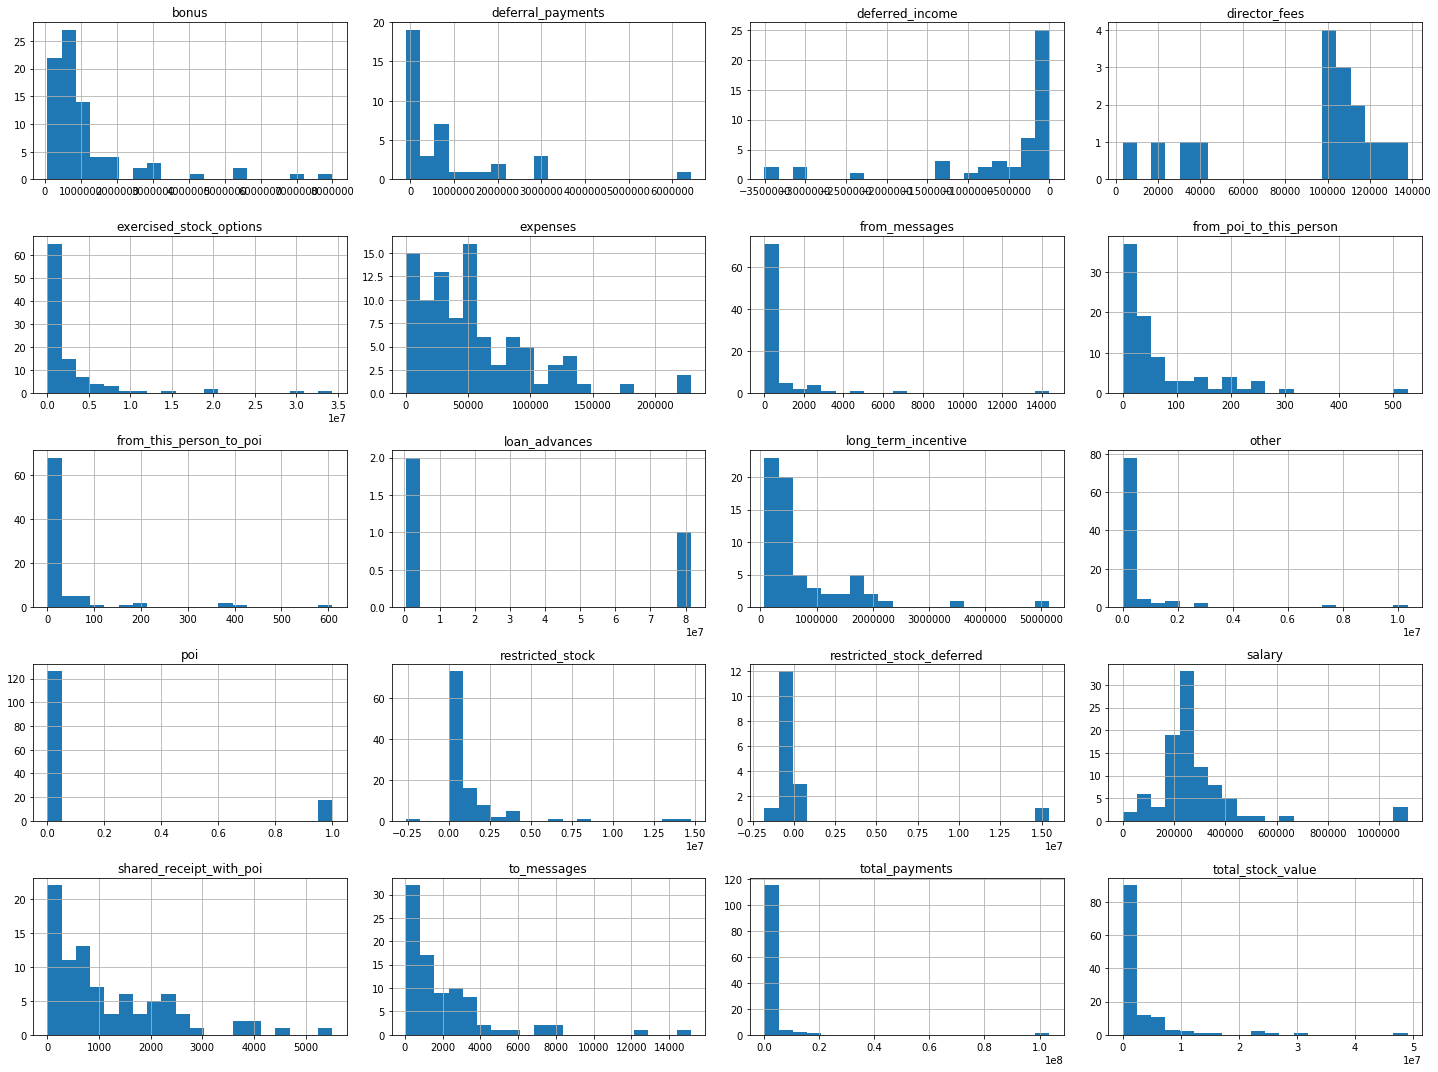

In [17]:
data_Frame.hist(bins=20,figsize=(20,15));
plt.tight_layout()
plt.savefig(IMAGES+"features_histogram_plots", dpi='figure')
plt.show()

In [18]:
### Task 2: Remove outliers

In [19]:
def crt_plot(data, features, type='box', figsize=(20,15), shape=(1,1), log=[], bins=10, sort=True, color='orange', save=False):
    '''
    Creates multiple boxplots from dataframe and organizes plots in 2D matrix.
    ---
    data:        pandas data frame
    features:    list of column names of data frame to be plotted
    figsize:     tuple of width x hight
    shape:       tuple of rows x columns in fig
    log:         list of features with logarithmic y axis scale (only necessary when your data contains outlyers)
    sort:        boolean, if True features will be sorted
    color:       color string, see matplotlib docs for valid colors
    save:        filename as string or False
    
    Returns None
    '''
    rows = shape[0]
    cols = shape[1]
    fig, ax = plt.subplots(rows, cols, figsize=figsize)
    if sort == True:
        plot_iter = iter( sorted(features) )
    else:
        plot_iter = iter( features )
    for row in range(rows):
        for col in range(cols):
            column = next(plot_iter, 'STOP')
            if column == 'STOP':
                continue
            else:
                sns.boxplot(data=data[column], ax=ax[row,col], color=color)
                ax[row,col].set_title(column)
                if column in log:
                    ax[row,col].set_yscale('log')
    plt.tight_layout()
    if save is not False:
        plt.savefig(save, dpi='figure')
    plt.show()
    return None

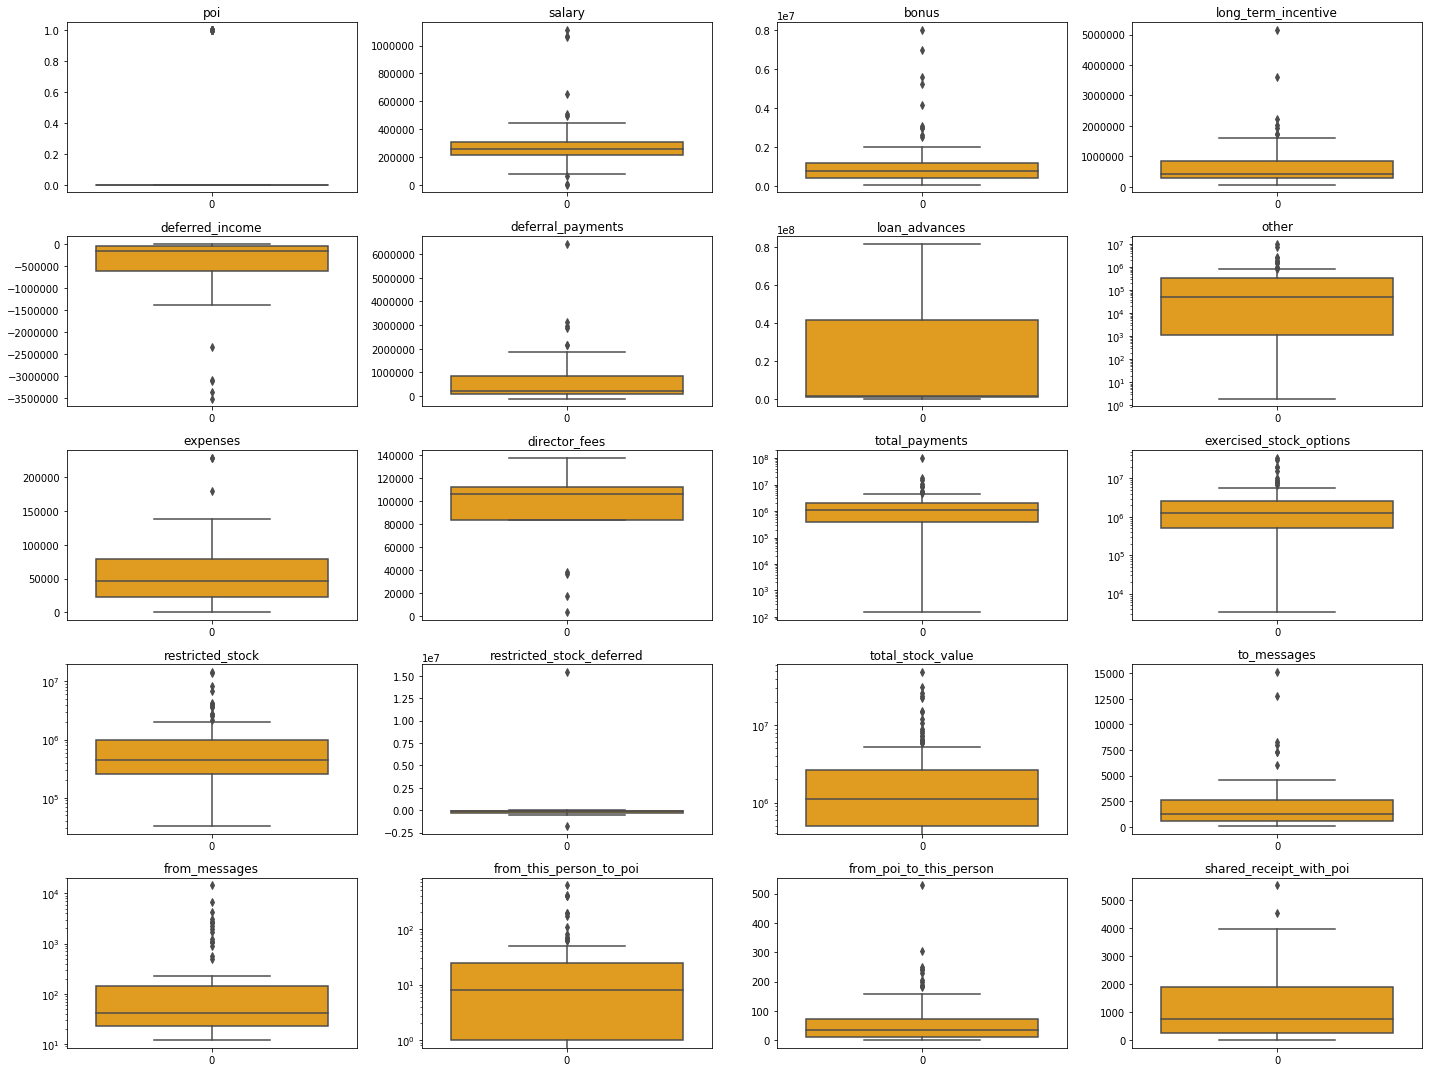

In [20]:
log_list = ['from_messages', 'from_this_person_to_poi', 'total_payments', 'total_stock_value', 'other', 'restricted_stock', 'exercised_stock_options']
crt_plot(data_Frame, ['poi'] + feature_list, shape=(5,4), log=log_list, save=IMAGES+"features_box_plots", sort=False)

In [21]:
# Checked, OK
data_Frame[ data_Frame['salary'] >= 1000000 ]

,poi,salary,bonus,long_term_incentive,deferred_income,deferral_payments,loan_advances,other,expenses,director_fees,...,exercised_stock_options,restricted_stock,restricted_stock_deferred,total_stock_value,email_address,to_messages,from_messages,from_this_person_to_poi,from_poi_to_this_person,shared_receipt_with_poi
FREVERT MARK A,0,1060932.0,2000000.0,1617011.0,-3367011.0,6426990.0,2000000.0,7427621.0,86987.0,NaN,...,10433518.0,4188667.0,NaN,14622185.0,mark.frevert@enron.com,3275.0,21.0,6.0,242.0,2979.0
LAY KENNETH L,1,1072321.0,7000000.0,3600000.0,-300000.0,202911.0,81525000.0,10359729.0,99832.0,NaN,...,34348384.0,14761694.0,NaN,49110078.0,kenneth.lay@enron.com,4273.0,36.0,16.0,123.0,2411.0
SKILLING JEFFREY K,1,1111258.0,5600000.0,1920000.0,NaN,NaN,NaN,22122.0,29336.0,NaN,...,19250000.0,6843672.0,NaN,26093672.0,jeff.skilling@enron.com,3627.0,108.0,30.0,88.0,2042.0


In [22]:
# Checked, OK
data_Frame[ data_Frame['long_term_incentive'] >= 3000000 ]

,poi,salary,bonus,long_term_incentive,deferred_income,deferral_payments,loan_advances,other,expenses,director_fees,...,exercised_stock_options,restricted_stock,restricted_stock_deferred,total_stock_value,email_address,to_messages,from_messages,from_this_person_to_poi,from_poi_to_this_person,shared_receipt_with_poi
LAY KENNETH L,1,1072321.0,7000000.0,3600000.0,-300000.0,202911.0,81525000.0,10359729.0,99832.0,NaN,...,34348384.0,14761694.0,NaN,49110078.0,kenneth.lay@enron.com,4273.0,36.0,16.0,123.0,2411.0
MARTIN AMANDA K,0,349487.0,NaN,5145434.0,NaN,85430.0,NaN,2818454.0,8211.0,NaN,...,2070306.0,NaN,NaN,2070306.0,a..martin@enron.com,1522.0,230.0,0.0,8.0,477.0


In [23]:
# Checked, OK
data_Frame[ data_Frame['bonus'] >= 4000000 ]

,poi,salary,bonus,long_term_incentive,deferred_income,deferral_payments,loan_advances,other,expenses,director_fees,...,exercised_stock_options,restricted_stock,restricted_stock_deferred,total_stock_value,email_address,to_messages,from_messages,from_this_person_to_poi,from_poi_to_this_person,shared_receipt_with_poi
ALLEN PHILLIP K,0,201955.0,4175000.0,304805.0,-3081055.0,2869717.0,NaN,152.0,13868.0,NaN,...,1729541.0,126027.0,-126027.0,1729541.0,phillip.allen@enron.com,2902.0,2195.0,65.0,47.0,1407.0
BELDEN TIMOTHY N,1,213999.0,5249999.0,NaN,-2334434.0,2144013.0,NaN,210698.0,17355.0,NaN,...,953136.0,157569.0,NaN,1110705.0,tim.belden@enron.com,7991.0,484.0,108.0,228.0,5521.0
LAVORATO JOHN J,0,339288.0,8000000.0,2035380.0,NaN,NaN,NaN,1552.0,49537.0,NaN,...,4158995.0,1008149.0,NaN,5167144.0,john.lavorato@enron.com,7259.0,2585.0,411.0,528.0,3962.0
LAY KENNETH L,1,1072321.0,7000000.0,3600000.0,-300000.0,202911.0,81525000.0,10359729.0,99832.0,NaN,...,34348384.0,14761694.0,NaN,49110078.0,kenneth.lay@enron.com,4273.0,36.0,16.0,123.0,2411.0
SKILLING JEFFREY K,1,1111258.0,5600000.0,1920000.0,NaN,NaN,NaN,22122.0,29336.0,NaN,...,19250000.0,6843672.0,NaN,26093672.0,jeff.skilling@enron.com,3627.0,108.0,30.0,88.0,2042.0


In [24]:
# Checked, OK
data_Frame[ data_Frame['deferral_payments'] >= 3000000 ]

,poi,salary,bonus,long_term_incentive,deferred_income,deferral_payments,loan_advances,other,expenses,director_fees,...,exercised_stock_options,restricted_stock,restricted_stock_deferred,total_stock_value,email_address,to_messages,from_messages,from_this_person_to_poi,from_poi_to_this_person,shared_receipt_with_poi
FREVERT MARK A,0,1060932.0,2000000.0,1617011.0,-3367011.0,6426990.0,2000000.0,7427621.0,86987.0,NaN,...,10433518.0,4188667.0,NaN,14622185.0,mark.frevert@enron.com,3275.0,21.0,6.0,242.0,2979.0
HORTON STANLEY C,0,NaN,NaN,NaN,NaN,3131860.0,NaN,NaN,NaN,NaN,...,5210569.0,2046079.0,NaN,7256648.0,stanley.horton@enron.com,2350.0,1073.0,15.0,44.0,1074.0


In [25]:
# Checked, OK
data_Frame[ data_Frame['other'] >= 3000000 ]

,poi,salary,bonus,long_term_incentive,deferred_income,deferral_payments,loan_advances,other,expenses,director_fees,...,exercised_stock_options,restricted_stock,restricted_stock_deferred,total_stock_value,email_address,to_messages,from_messages,from_this_person_to_poi,from_poi_to_this_person,shared_receipt_with_poi
FREVERT MARK A,0,1060932.0,2000000.0,1617011.0,-3367011.0,6426990.0,2000000.0,7427621.0,86987.0,NaN,...,10433518.0,4188667.0,NaN,14622185.0,mark.frevert@enron.com,3275.0,21.0,6.0,242.0,2979.0
LAY KENNETH L,1,1072321.0,7000000.0,3600000.0,-300000.0,202911.0,81525000.0,10359729.0,99832.0,NaN,...,34348384.0,14761694.0,NaN,49110078.0,kenneth.lay@enron.com,4273.0,36.0,16.0,123.0,2411.0


In [26]:
# Checked, OK
data_Frame[ data_Frame['expenses'] >= 200000 ]

,poi,salary,bonus,long_term_incentive,deferred_income,deferral_payments,loan_advances,other,expenses,director_fees,...,exercised_stock_options,restricted_stock,restricted_stock_deferred,total_stock_value,email_address,to_messages,from_messages,from_this_person_to_poi,from_poi_to_this_person,shared_receipt_with_poi
MCCLELLAN GEORGE,0,263413.0,900000.0,NaN,-125000.0,NaN,NaN,51587.0,228763.0,NaN,...,506765.0,441096.0,NaN,947861.0,george.mcclellan@enron.com,1744.0,49.0,0.0,52.0,1469.0
URQUHART JOHN A,0,NaN,NaN,NaN,-36666.0,NaN,NaN,NaN,228656.0,36666.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
# Checked, OK
data_Frame[ data_Frame['director_fees'] <= 100000 ]

,poi,salary,bonus,long_term_incentive,deferred_income,deferral_payments,loan_advances,other,expenses,director_fees,...,exercised_stock_options,restricted_stock,restricted_stock_deferred,total_stock_value,email_address,to_messages,from_messages,from_this_person_to_poi,from_poi_to_this_person,shared_receipt_with_poi
BELFER ROBERT,0,NaN,NaN,NaN,NaN,-102500.0,NaN,NaN,NaN,3285.0,...,3285.0,NaN,44093.0,-44093.0,NaN,NaN,NaN,NaN,NaN,NaN
CHAN RONNIE,0,NaN,NaN,NaN,-98784.0,NaN,NaN,NaN,NaN,98784.0,...,NaN,32460.0,-32460.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MEYER JEROME J,0,NaN,NaN,NaN,-38346.0,NaN,NaN,NaN,2151.0,38346.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
POWERS WILLIAM,0,NaN,NaN,NaN,-17500.0,NaN,NaN,NaN,NaN,17500.0,...,NaN,NaN,NaN,NaN,ken.powers@enron.com,653.0,26.0,0.0,0.0,12.0
URQUHART JOHN A,0,NaN,NaN,NaN,-36666.0,NaN,NaN,NaN,228656.0,36666.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
# Checked. OK
data_Frame[ data_Frame['exercised_stock_options'] >= 15000000 ]

,poi,salary,bonus,long_term_incentive,deferred_income,deferral_payments,loan_advances,other,expenses,director_fees,...,exercised_stock_options,restricted_stock,restricted_stock_deferred,total_stock_value,email_address,to_messages,from_messages,from_this_person_to_poi,from_poi_to_this_person,shared_receipt_with_poi
HIRKO JOSEPH,1,NaN,NaN,NaN,NaN,10259.0,NaN,2856.0,77978.0,NaN,...,30766064.0,NaN,NaN,30766064.0,joe.hirko@enron.com,NaN,NaN,NaN,NaN,NaN
LAY KENNETH L,1,1072321.0,7000000.0,3600000.0,-300000.0,202911.0,81525000.0,10359729.0,99832.0,NaN,...,34348384.0,14761694.0,NaN,49110078.0,kenneth.lay@enron.com,4273.0,36.0,16.0,123.0,2411.0
PAI LOU L,0,261879.0,1000000.0,NaN,NaN,NaN,NaN,1829457.0,32047.0,NaN,...,15364167.0,8453763.0,NaN,23817930.0,lou.pai@enron.com,NaN,NaN,NaN,NaN,NaN
RICE KENNETH D,1,420636.0,1750000.0,1617011.0,-3504386.0,NaN,NaN,174839.0,46950.0,NaN,...,19794175.0,2748364.0,NaN,22542539.0,ken.rice@enron.com,905.0,18.0,4.0,42.0,864.0
SKILLING JEFFREY K,1,1111258.0,5600000.0,1920000.0,NaN,NaN,NaN,22122.0,29336.0,NaN,...,19250000.0,6843672.0,NaN,26093672.0,jeff.skilling@enron.com,3627.0,108.0,30.0,88.0,2042.0


In [29]:
# Checked, OK
data_Frame[ data_Frame['restricted_stock_deferred'] <= -500000 ]

,poi,salary,bonus,long_term_incentive,deferred_income,deferral_payments,loan_advances,other,expenses,director_fees,...,exercised_stock_options,restricted_stock,restricted_stock_deferred,total_stock_value,email_address,to_messages,from_messages,from_this_person_to_poi,from_poi_to_this_person,shared_receipt_with_poi
BANNANTINE JAMES M,0,477.0,NaN,NaN,-5104.0,NaN,NaN,864523.0,56301.0,NaN,...,4046157.0,1757552.0,-560222.0,5243487.0,james.bannantine@enron.com,566.0,29.0,0.0,39.0,465.0
DERRICK JR. JAMES V,0,492375.0,800000.0,484000.0,-1284000.0,NaN,NaN,7482.0,51124.0,NaN,...,8831913.0,1787380.0,-1787380.0,8831913.0,james.derrick@enron.com,2181.0,909.0,20.0,64.0,1401.0


In [30]:
# Checked, OK
data_Frame[ data_Frame['restricted_stock'] >= 10000000 ]

,poi,salary,bonus,long_term_incentive,deferred_income,deferral_payments,loan_advances,other,expenses,director_fees,...,exercised_stock_options,restricted_stock,restricted_stock_deferred,total_stock_value,email_address,to_messages,from_messages,from_this_person_to_poi,from_poi_to_this_person,shared_receipt_with_poi
LAY KENNETH L,1,1072321.0,7000000.0,3600000.0,-300000.0,202911.0,81525000.0,10359729.0,99832.0,NaN,...,34348384.0,14761694.0,NaN,49110078.0,kenneth.lay@enron.com,4273.0,36.0,16.0,123.0,2411.0
WHITE JR THOMAS E,0,317543.0,450000.0,NaN,NaN,NaN,NaN,1085463.0,81353.0,NaN,...,1297049.0,13847074.0,NaN,15144123.0,thomas.white@enron.com,NaN,NaN,NaN,NaN,NaN


In [31]:
data_Frame[ data_Frame['total_payments'].isna() ].loc[ data_Frame['total_stock_value'].isna() ]

,poi,salary,bonus,long_term_incentive,deferred_income,deferral_payments,loan_advances,other,expenses,director_fees,...,exercised_stock_options,restricted_stock,restricted_stock_deferred,total_stock_value,email_address,to_messages,from_messages,from_this_person_to_poi,from_poi_to_this_person,shared_receipt_with_poi
CHAN RONNIE,0,NaN,NaN,NaN,-98784.0,NaN,NaN,NaN,NaN,98784.0,...,NaN,32460.0,-32460.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LOCKHART EUGENE E,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
POWERS WILLIAM,0,NaN,NaN,NaN,-17500.0,NaN,NaN,NaN,NaN,17500.0,...,NaN,NaN,NaN,NaN,ken.powers@enron.com,653.0,26.0,0.0,0.0,12.0


In [32]:
data_Frame[ data_Frame['restricted_stock_deferred'].notna()  ][ ['salary', 'bonus', 'long_term_incentive', 'deferred_income', 'deferral_payments', 'loan_advances', 'other', 'expenses', 'director_fees', 'total_payments', 
           'exercised_stock_options', 'restricted_stock', 'restricted_stock_deferred', 'total_stock_value'] ]

,salary,bonus,long_term_incentive,deferred_income,deferral_payments,loan_advances,other,expenses,director_fees,total_payments,exercised_stock_options,restricted_stock,restricted_stock_deferred,total_stock_value
ALLEN PHILLIP K,201955.0,4175000.0,304805.0,-3081055.0,2869717.0,NaN,152.0,13868.0,NaN,4484442.0,1729541.0,126027.0,-126027.0,1729541.0
BANNANTINE JAMES M,477.0,NaN,NaN,-5104.0,NaN,NaN,864523.0,56301.0,NaN,916197.0,4046157.0,1757552.0,-560222.0,5243487.0
BAY FRANKLIN R,239671.0,400000.0,NaN,-201641.0,260455.0,NaN,69.0,129142.0,NaN,827696.0,NaN,145796.0,-82782.0,63014.0
BELFER ROBERT,NaN,NaN,NaN,NaN,-102500.0,NaN,NaN,NaN,3285.0,102500.0,3285.0,NaN,44093.0,-44093.0
BHATNAGAR SANJAY,NaN,NaN,NaN,NaN,NaN,NaN,137864.0,NaN,137864.0,15456290.0,2604490.0,-2604490.0,15456290.0,NaN
CARTER REBECCA C,261809.0,300000.0,75000.0,-159792.0,NaN,NaN,540.0,NaN,NaN,477557.0,NaN,307301.0,-307301.0,NaN
CHAN RONNIE,NaN,NaN,NaN,-98784.0,NaN,NaN,NaN,NaN,98784.0,NaN,NaN,32460.0,-32460.0,NaN
CLINE KENNETH W,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,662086.0,-472568.0,189518.0
DERRICK JR. JAMES V,492375.0,800000.0,484000.0,-1284000.0,NaN,NaN,7482.0,51124.0,NaN,550981.0,8831913.0,1787380.0,-1787380.0,8831913.0
DETMERING TIMOTHY J,210500.0,425000.0,415657.0,-775241.0,875307.0,NaN,1105.0,52255.0,NaN,1204583.0,2027865.0,315068.0,-315068.0,2027865.0


In [33]:
data_Frame_eval = data_Frame.fillna(value=0.0)

In [34]:
data_Frame_eval['eval_payments'] = data_Frame_eval['salary'] + data_Frame_eval['bonus'] + data_Frame_eval['long_term_incentive'] + data_Frame_eval['deferred_income'] + data_Frame_eval['deferral_payments'] + data_Frame_eval['loan_advances'] + data_Frame_eval['other'] + data_Frame_eval['expenses'] + data_Frame_eval['director_fees'] - data_Frame_eval['total_payments']

In [35]:
data_Frame_eval[ data_Frame_eval['eval_payments'] != 0.0 ][['salary', 'bonus', 'long_term_incentive', 'deferred_income', 'deferral_payments', 'loan_advances', 'other', 'expenses', 'director_fees', 'total_payments', 'eval_payments', 
           'exercised_stock_options', 'restricted_stock', 'restricted_stock_deferred', 'total_stock_value']]

,salary,bonus,long_term_incentive,deferred_income,deferral_payments,loan_advances,other,expenses,director_fees,total_payments,eval_payments,exercised_stock_options,restricted_stock,restricted_stock_deferred,total_stock_value
BELFER ROBERT,0.0,0.0,0.0,0.0,-102500.0,0.0,0.0,0.0,3285.0,102500.0,-201715.0,3285.0,0.0,44093.0,-44093.0
BHATNAGAR SANJAY,0.0,0.0,0.0,0.0,0.0,0.0,137864.0,0.0,137864.0,15456290.0,-15180562.0,2604490.0,-2604490.0,15456290.0,0.0


In [36]:
data_Frame_eval['eval_stock'] = data_Frame_eval['exercised_stock_options'] + data_Frame_eval['restricted_stock'] + data_Frame_eval['restricted_stock_deferred'] - data_Frame_eval['total_stock_value']

In [37]:
data_Frame_eval[ data_Frame_eval['eval_stock'] != 0.0 ][['salary', 'bonus', 'long_term_incentive', 'deferred_income', 'deferral_payments', 'loan_advances', 'other', 'expenses', 'director_fees', 'total_payments', 'eval_payments', 
           'exercised_stock_options', 'restricted_stock', 'restricted_stock_deferred', 'total_stock_value', 'eval_stock'] ]

,salary,bonus,long_term_incentive,deferred_income,deferral_payments,loan_advances,other,expenses,director_fees,total_payments,eval_payments,exercised_stock_options,restricted_stock,restricted_stock_deferred,total_stock_value,eval_stock
BELFER ROBERT,0.0,0.0,0.0,0.0,-102500.0,0.0,0.0,0.0,3285.0,102500.0,-201715.0,3285.0,0.0,44093.0,-44093.0,91471.0
BHATNAGAR SANJAY,0.0,0.0,0.0,0.0,0.0,0.0,137864.0,0.0,137864.0,15456290.0,-15180562.0,2604490.0,-2604490.0,15456290.0,0.0,15456290.0


In [38]:
# Correcting Robert Belfer instance
data_Frame.loc['BELFER ROBERT', 'restricted_stock'] = 44093.0
data_Frame.loc['BELFER ROBERT', 'restricted_stock_deferred'] = -44093.0
data_Frame.loc['BELFER ROBERT', 'exercised_stock_options'] = np.NaN
data_Frame.loc['BELFER ROBERT', 'total_stock_value'] = np.NaN
data_Frame.loc['BELFER ROBERT', 'director_fees'] = 102500.0
data_Frame.loc['BELFER ROBERT', 'deferred_income'] = -102500.0
data_Frame.loc['BELFER ROBERT', 'deferral_payments'] = np.NaN
data_Frame.loc['BELFER ROBERT', 'expenses'] = 3285.0
data_Frame.loc['BELFER ROBERT', 'total_payments'] = 3285.0

In [39]:
# Correcting BHATNAGAR SANJAY
data_Frame.loc['BHATNAGAR SANJAY', 'other'] = np.NaN
data_Frame.loc['BHATNAGAR SANJAY', 'expenses'] = 137864.0
data_Frame.loc['BHATNAGAR SANJAY', 'director_fees'] = np.NaN
data_Frame.loc['BHATNAGAR SANJAY', 'total_payments'] = 137864.0
data_Frame.loc['BHATNAGAR SANJAY', 'exercised_stock_options'] = 15456290.0
data_Frame.loc['BHATNAGAR SANJAY', 'restricted_stock'] = 2604490.0
data_Frame.loc['BHATNAGAR SANJAY', 'restricted_stock_deferred'] = -2604490.0
data_Frame.loc['BHATNAGAR SANJAY', 'total_stock_value'] = 15456290.0

In [40]:
data_Frame_eval = data_Frame.fillna(value=0.0)
data_Frame_eval['eval_payments'] = data_Frame_eval['salary'] + data_Frame_eval['bonus'] + data_Frame_eval['long_term_incentive'] + data_Frame_eval['deferred_income'] + data_Frame_eval['deferral_payments'] + data_Frame_eval['loan_advances'] + data_Frame_eval['other'] + data_Frame_eval['expenses'] + data_Frame_eval['director_fees'] - data_Frame_eval['total_payments']
data_Frame_eval['eval_stock'] = data_Frame_eval['exercised_stock_options'] + data_Frame_eval['restricted_stock'] + data_Frame_eval['restricted_stock_deferred'] - data_Frame_eval['total_stock_value']

In [41]:
data_Frame_eval[ data_Frame_eval['eval_payments'] != 0.0 ][['salary', 'bonus', 'long_term_incentive', 'deferred_income', 'deferral_payments', 'loan_advances', 'other', 'expenses', 'director_fees', 'total_payments', 'eval_payments', 
           'exercised_stock_options', 'restricted_stock', 'restricted_stock_deferred', 'total_stock_value']]

,salary,bonus,long_term_incentive,deferred_income,deferral_payments,loan_advances,other,expenses,director_fees,total_payments,eval_payments,exercised_stock_options,restricted_stock,restricted_stock_deferred,total_stock_value


In [42]:
data_Frame.loc[ ['BELFER ROBERT', 'BHATNAGAR SANJAY'] ][['salary', 'bonus', 'long_term_incentive', 'deferred_income', 'deferral_payments', 'loan_advances', 'other', 'expenses', 'director_fees', 'total_payments', 
           'exercised_stock_options', 'restricted_stock', 'restricted_stock_deferred', 'total_stock_value']]

,salary,bonus,long_term_incentive,deferred_income,deferral_payments,loan_advances,other,expenses,director_fees,total_payments,exercised_stock_options,restricted_stock,restricted_stock_deferred,total_stock_value
BELFER ROBERT,NaN,NaN,NaN,-102500.0,NaN,NaN,NaN,3285.0,102500.0,3285.0,NaN,44093.0,-44093.0,NaN
BHATNAGAR SANJAY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,137864.0,NaN,137864.0,15456290.0,2604490.0,-2604490.0,15456290.0


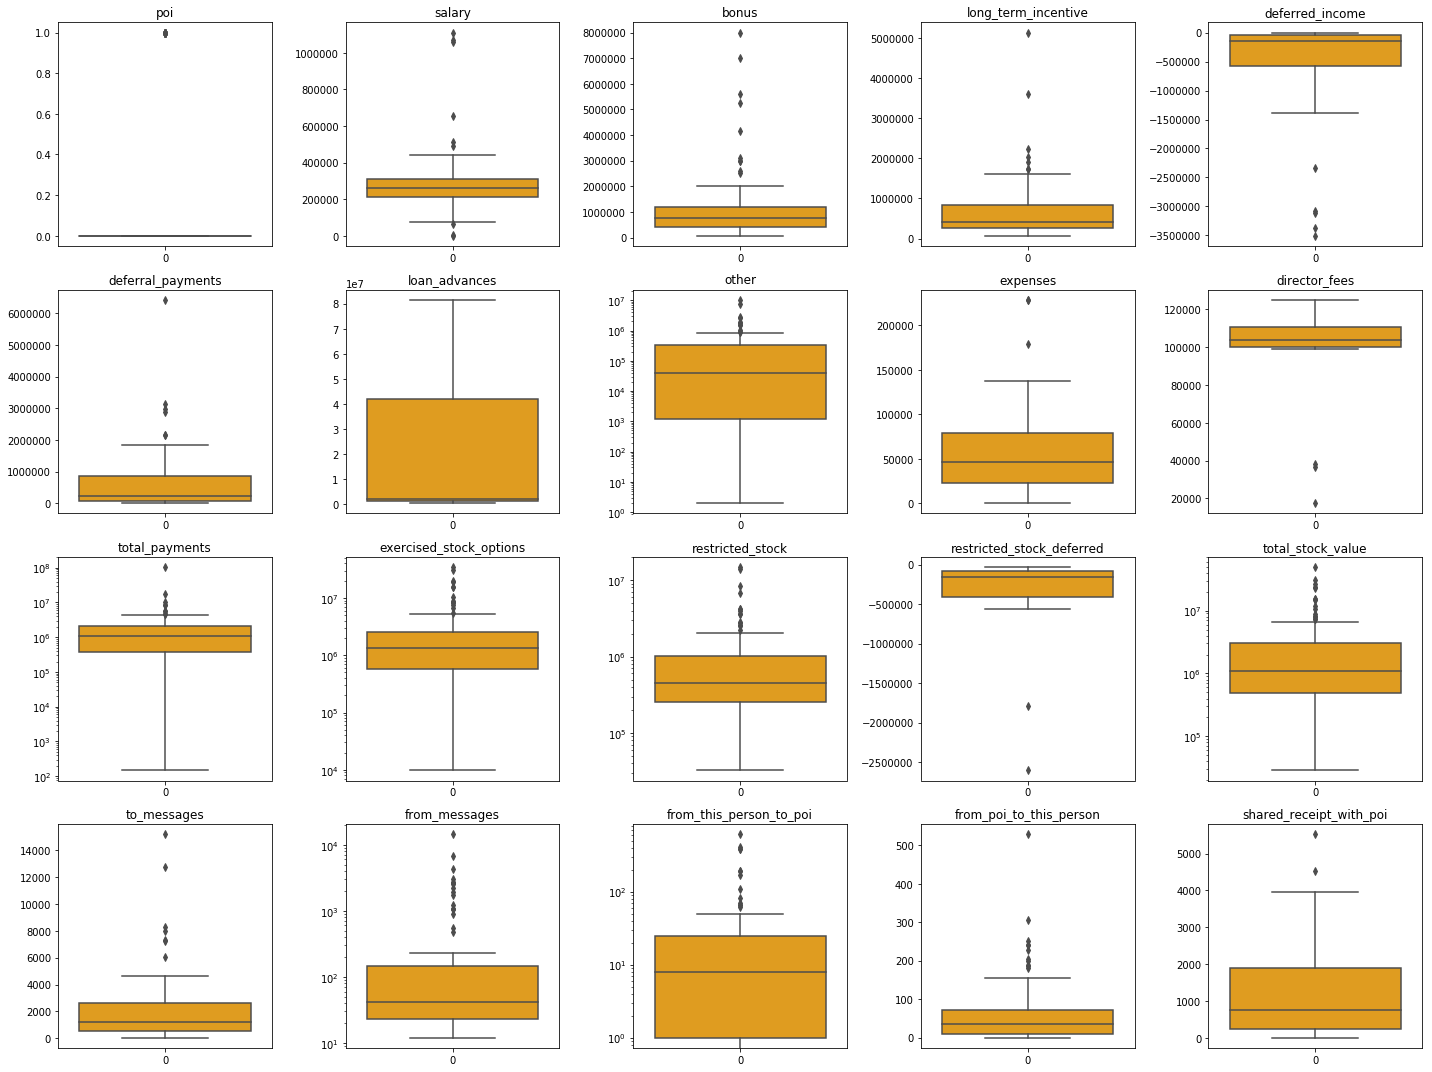

In [43]:
# After correctiong the data we check the boxplots again
crt_plot(data_Frame, ['poi'] + feature_list, shape=(4,5), log=log_list, sort=False, save=IMAGES+"features_box_plots_corrected")

In [44]:
# Check email

In [45]:
# Checked, OK
data_Frame[ data_Frame['to_messages'] >= 8000 ]

,poi,salary,bonus,long_term_incentive,deferred_income,deferral_payments,loan_advances,other,expenses,director_fees,...,exercised_stock_options,restricted_stock,restricted_stock_deferred,total_stock_value,email_address,to_messages,from_messages,from_this_person_to_poi,from_poi_to_this_person,shared_receipt_with_poi
KEAN STEVEN J,0,404338.0,1000000.0,300000.0,NaN,NaN,NaN,1231.0,41953.0,NaN,...,2022048.0,4131594.0,NaN,6153642.0,steven.kean@enron.com,12754.0,6759.0,387.0,140.0,3639.0
KITCHEN LOUISE,0,271442.0,3100000.0,NaN,NaN,NaN,NaN,93925.0,5774.0,NaN,...,81042.0,466101.0,NaN,547143.0,louise.kitchen@enron.com,8305.0,1728.0,194.0,251.0,3669.0
SHAPIRO RICHARD S,0,269076.0,650000.0,NaN,NaN,NaN,NaN,705.0,137767.0,NaN,...,607837.0,379164.0,NaN,987001.0,richard.shapiro@enron.com,15149.0,1215.0,65.0,74.0,4527.0


In [46]:
# Checked, Kaminski doesn't look correct. He clearly didn't send 14k mails and just received 4600.
data_Frame[ data_Frame['from_messages'] >= 5000 ]

,poi,salary,bonus,long_term_incentive,deferred_income,deferral_payments,loan_advances,other,expenses,director_fees,...,exercised_stock_options,restricted_stock,restricted_stock_deferred,total_stock_value,email_address,to_messages,from_messages,from_this_person_to_poi,from_poi_to_this_person,shared_receipt_with_poi
KAMINSKI WINCENTY J,0,275101.0,400000.0,323466.0,NaN,NaN,NaN,4669.0,83585.0,NaN,...,850010.0,126027.0,NaN,976037.0,vince.kaminski@enron.com,4607.0,14368.0,171.0,41.0,583.0
KEAN STEVEN J,0,404338.0,1000000.0,300000.0,NaN,NaN,NaN,1231.0,41953.0,NaN,...,2022048.0,4131594.0,NaN,6153642.0,steven.kean@enron.com,12754.0,6759.0,387.0,140.0,3639.0


In [47]:
# Checked, OK
data_Frame[ data_Frame['from_this_person_to_poi'] >= 300 ]

,poi,salary,bonus,long_term_incentive,deferred_income,deferral_payments,loan_advances,other,expenses,director_fees,...,exercised_stock_options,restricted_stock,restricted_stock_deferred,total_stock_value,email_address,to_messages,from_messages,from_this_person_to_poi,from_poi_to_this_person,shared_receipt_with_poi
BECK SALLY W,0,231330.0,700000.0,NaN,NaN,NaN,NaN,566.0,37172.0,NaN,...,NaN,126027.0,NaN,126027.0,sally.beck@enron.com,7315.0,4343.0,386.0,144.0,2639.0
DELAINEY DAVID W,1,365163.0,3000000.0,1294981.0,NaN,NaN,NaN,1661.0,86174.0,NaN,...,2291113.0,1323148.0,NaN,3614261.0,david.delainey@enron.com,3093.0,3069.0,609.0,66.0,2097.0
KEAN STEVEN J,0,404338.0,1000000.0,300000.0,NaN,NaN,NaN,1231.0,41953.0,NaN,...,2022048.0,4131594.0,NaN,6153642.0,steven.kean@enron.com,12754.0,6759.0,387.0,140.0,3639.0
LAVORATO JOHN J,0,339288.0,8000000.0,2035380.0,NaN,NaN,NaN,1552.0,49537.0,NaN,...,4158995.0,1008149.0,NaN,5167144.0,john.lavorato@enron.com,7259.0,2585.0,411.0,528.0,3962.0


In [48]:
# Checked, OK
data_Frame[ data_Frame['from_poi_to_this_person'] >= 250 ]

,poi,salary,bonus,long_term_incentive,deferred_income,deferral_payments,loan_advances,other,expenses,director_fees,...,exercised_stock_options,restricted_stock,restricted_stock_deferred,total_stock_value,email_address,to_messages,from_messages,from_this_person_to_poi,from_poi_to_this_person,shared_receipt_with_poi
DIETRICH JANET R,0,250100.0,600000.0,556416.0,NaN,NaN,NaN,473.0,3475.0,NaN,...,1550019.0,315068.0,NaN,1865087.0,janet.dietrich@enron.com,2572.0,63.0,14.0,305.0,1902.0
KITCHEN LOUISE,0,271442.0,3100000.0,NaN,NaN,NaN,NaN,93925.0,5774.0,NaN,...,81042.0,466101.0,NaN,547143.0,louise.kitchen@enron.com,8305.0,1728.0,194.0,251.0,3669.0
LAVORATO JOHN J,0,339288.0,8000000.0,2035380.0,NaN,NaN,NaN,1552.0,49537.0,NaN,...,4158995.0,1008149.0,NaN,5167144.0,john.lavorato@enron.com,7259.0,2585.0,411.0,528.0,3962.0


In [49]:
# Checked, OK
data_Frame[ data_Frame['shared_receipt_with_poi'] >= 3000 ]

,poi,salary,bonus,long_term_incentive,deferred_income,deferral_payments,loan_advances,other,expenses,director_fees,...,exercised_stock_options,restricted_stock,restricted_stock_deferred,total_stock_value,email_address,to_messages,from_messages,from_this_person_to_poi,from_poi_to_this_person,shared_receipt_with_poi
BELDEN TIMOTHY N,1,213999.0,5249999.0,NaN,-2334434.0,2144013.0,NaN,210698.0,17355.0,NaN,...,953136.0,157569.0,NaN,1110705.0,tim.belden@enron.com,7991.0,484.0,108.0,228.0,5521.0
KEAN STEVEN J,0,404338.0,1000000.0,300000.0,NaN,NaN,NaN,1231.0,41953.0,NaN,...,2022048.0,4131594.0,NaN,6153642.0,steven.kean@enron.com,12754.0,6759.0,387.0,140.0,3639.0
KITCHEN LOUISE,0,271442.0,3100000.0,NaN,NaN,NaN,NaN,93925.0,5774.0,NaN,...,81042.0,466101.0,NaN,547143.0,louise.kitchen@enron.com,8305.0,1728.0,194.0,251.0,3669.0
LAVORATO JOHN J,0,339288.0,8000000.0,2035380.0,NaN,NaN,NaN,1552.0,49537.0,NaN,...,4158995.0,1008149.0,NaN,5167144.0,john.lavorato@enron.com,7259.0,2585.0,411.0,528.0,3962.0
SHAPIRO RICHARD S,0,269076.0,650000.0,NaN,NaN,NaN,NaN,705.0,137767.0,NaN,...,607837.0,379164.0,NaN,987001.0,richard.shapiro@enron.com,15149.0,1215.0,65.0,74.0,4527.0
WHALLEY LAWRENCE G,0,510364.0,3000000.0,808346.0,NaN,NaN,NaN,301026.0,57838.0,NaN,...,3282960.0,2796177.0,NaN,6079137.0,greg.whalley@enron.com,6019.0,556.0,24.0,186.0,3920.0


There are still many outlyer in the data. As extreme values might be an indication for fraud or any other irregular operation I'll keep the remaining data as is.
Data that I won't use fpr ML are:  

+ *email_address* (no value)
+ *loan_advances* (only 4 instances)
+ *to_messages* 
+ *from_messages*



In [50]:
feature_list

['salary',
 'bonus',
 'long_term_incentive',
 'deferred_income',
 'deferral_payments',
 'loan_advances',
 'other',
 'expenses',
 'director_fees',
 'total_payments',
 'exercised_stock_options',
 'restricted_stock',
 'restricted_stock_deferred',
 'total_stock_value',
 'to_messages',
 'from_messages',
 'from_this_person_to_poi',
 'from_poi_to_this_person',
 'shared_receipt_with_poi']

In [51]:
### Task 3: Create new feature(s)

In [52]:
remove_lst =  ['loan_advances', 'to_messages', 'from_messages' ]
# remove_lst =  ['loan_advances' ]
correlate = ['poi'] + feature_list
for instance in remove_lst:
    if instance in correlate:
        correlate.remove(instance)

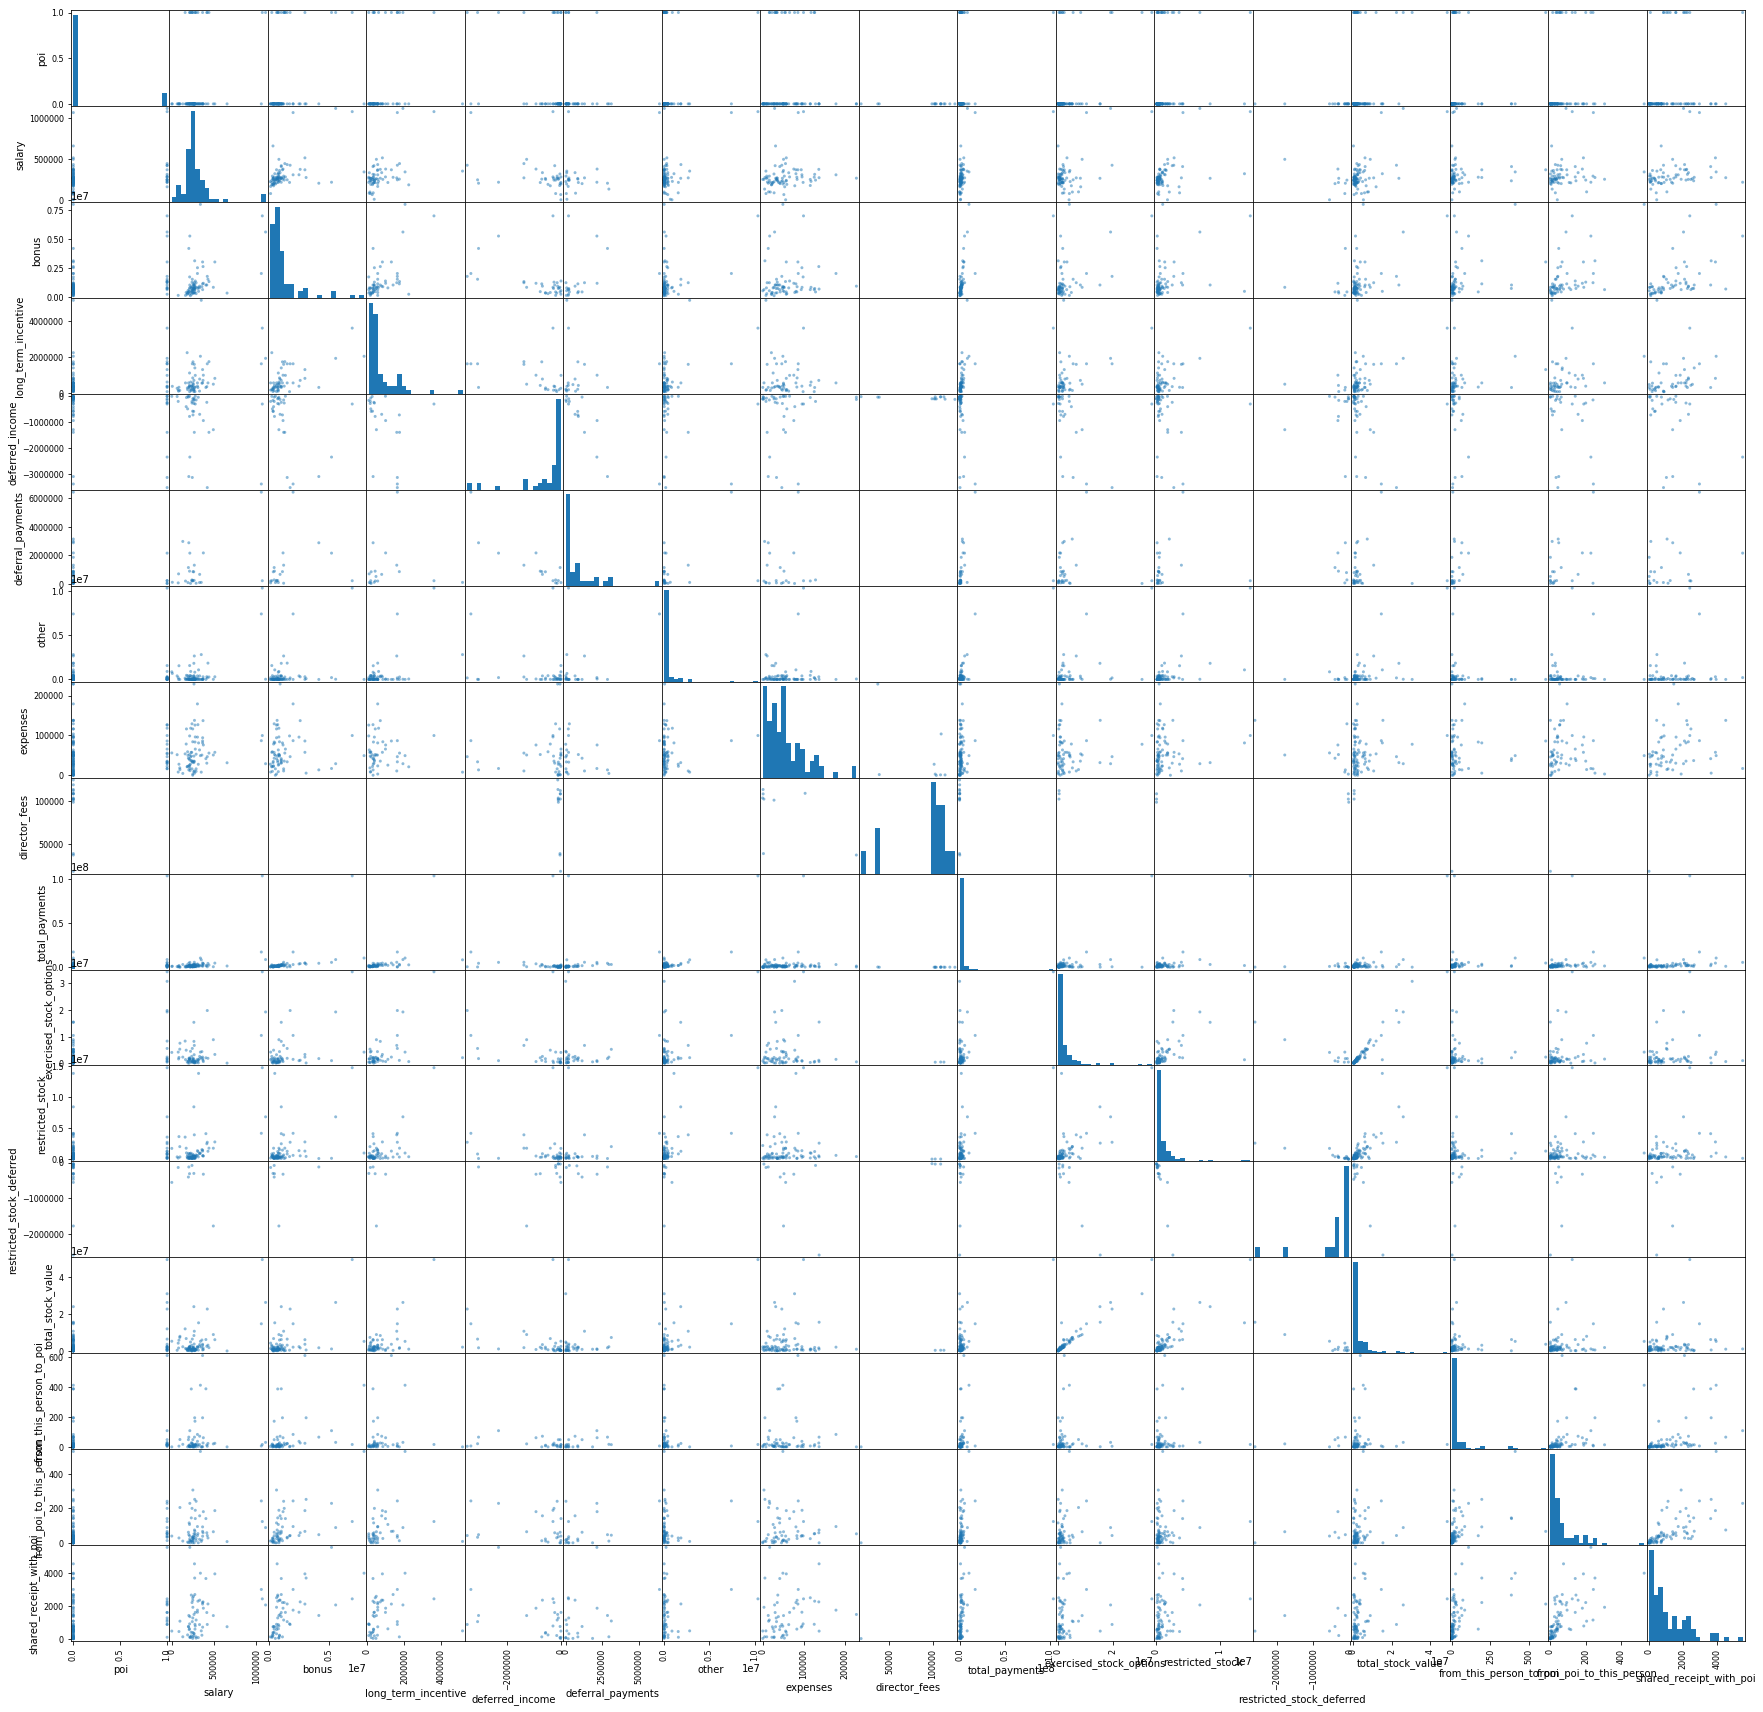

In [53]:
from pandas.plotting import scatter_matrix

scatter_matrix(data_Frame[correlate], figsize=(30, 30), hist_kwds={'bins':20} );
plt.savefig(IMAGES+"scatter_matrix_big", dpi='figure')

In [54]:
data_Frame[correlate].corr()

,poi,salary,bonus,long_term_incentive,deferred_income,deferral_payments,other,expenses,director_fees,total_payments,exercised_stock_options,restricted_stock,restricted_stock_deferred,total_stock_value,from_this_person_to_poi,from_poi_to_this_person,shared_receipt_with_poi
poi,1.000000,0.264976,0.302384,0.254723,-0.269866,-0.107254,0.119166,0.055209,NaN,0.237288,0.481875,0.219666,NaN,0.354220,0.112940,0.167722,0.228313
salary,0.264976,1.000000,0.523190,0.484114,-0.353816,0.455884,0.606903,0.145364,NaN,0.579260,0.607324,0.550824,-0.592576,0.614736,0.021288,0.179055,0.284995
bonus,0.302384,0.523190,1.000000,0.625259,-0.411659,0.293543,0.376371,0.033799,NaN,0.569054,0.506998,0.376992,0.118222,0.509441,0.354634,0.562187,0.549102
long_term_incentive,0.254723,0.484114,0.625259,1.000000,-0.331715,0.042448,0.529398,-0.100766,NaN,0.518498,0.500016,0.635172,-0.186597,0.495485,0.083591,0.212538,0.178944
deferred_income,-0.269866,-0.353816,-0.411659,-0.331715,1.000000,-0.881500,-0.185219,0.085678,-0.474047,-0.057065,-0.308076,-0.140510,0.200362,-0.298189,-0.271673,-0.178951,-0.394677
deferral_payments,-0.107254,0.455884,0.293543,0.042448,-0.881500,1.000000,0.385829,0.004800,NaN,0.061585,0.006560,0.115088,-0.217200,0.066470,0.206993,0.424101,0.356696
other,0.119166,0.606903,0.376371,0.529398,-0.185219,0.385829,1.000000,0.062874,NaN,0.834424,0.535934,0.650015,-0.029366,0.627171,-0.112243,0.108861,0.120358
expenses,0.055209,0.145364,0.033799,-0.100766,0.085678,0.004800,0.062874,1.000000,-0.521463,0.105375,0.066763,0.060546,-0.527262,0.065689,0.001107,-0.081925,0.194601
director_fees,NaN,NaN,NaN,NaN,-0.474047,NaN,NaN,-0.521463,1.000000,-0.233928,0.769988,0.784221,-0.784221,0.769988,NaN,NaN,NaN
total_payments,0.237288,0.579260,0.569054,0.518498,-0.057065,0.061585,0.834424,0.105375,-0.233928,1.000000,0.575716,0.626467,0.228501,0.654867,0.019011,0.168940,0.204084


In [85]:
X = data_Frame['from_poi_to_this_person'].div(data_Frame['to_messages'])
X[X>0.1]

COLWELL WESLEY          0.136519
DEFFNER JOSEPH M        0.161064
DIETRICH JANET R        0.118585
DONAHUE JR JEFFREY M    0.217341
DURAN WILLIAM D         0.117257
REDMOND BRIAN L         0.122083
UMANOFF ADAM S          0.108108
dtype: float64

In [64]:
data_Frame.corrwith(X)

poi                          0.104406
salary                      -0.130777
bonus                       -0.061878
long_term_incentive          0.009281
deferred_income              0.148719
deferral_payments            0.241365
loan_advances               -0.189228
other                       -0.021743
expenses                    -0.143783
director_fees                     NaN
total_payments              -0.027364
exercised_stock_options     -0.011850
restricted_stock            -0.074553
restricted_stock_deferred    0.601993
total_stock_value           -0.016185
to_messages                 -0.133672
from_messages               -0.130654
from_this_person_to_poi     -0.052852
from_poi_to_this_person      0.468983
shared_receipt_with_poi     -0.036665
dtype: float64

In [88]:
Y = data_Frame['from_this_person_to_poi'].div(data_Frame['from_messages'])
Y[Y>0.5]

BOWEN JR RAYMOND M    0.555556
GARLAND C KEVIN       0.613636
HANNON KEVIN P        0.656250
HUMPHREY GENE E       1.000000
MCMAHON JEFFREY       0.541667
RIEKER PAULA H        0.585366
SHERRICK JEFFREY B    0.720000
TILNEY ELIZABETH A    0.578947
dtype: float64

In [90]:
data_Frame.loc['HUMPHREY GENE E']

poi                                                0
salary                                        130724
bonus                                            NaN
long_term_incentive                              NaN
deferred_income                                  NaN
deferral_payments                        2.96451e+06
loan_advances                                    NaN
other                                            NaN
expenses                                        4994
director_fees                                    NaN
total_payments                           3.10022e+06
exercised_stock_options                  2.28277e+06
restricted_stock                                 NaN
restricted_stock_deferred                        NaN
total_stock_value                        2.28277e+06
email_address                gene.humphrey@enron.com
to_messages                                      128
from_messages                                     17
from_this_person_to_poi                       

In [65]:
data_Frame.corrwith(Y)

poi                          0.339938
salary                       0.004715
bonus                        0.068153
long_term_incentive          0.027852
deferred_income             -0.019555
deferral_payments            0.202902
loan_advances                0.783924
other                        0.142128
expenses                    -0.153519
director_fees                     NaN
total_payments               0.143851
exercised_stock_options      0.106095
restricted_stock             0.138028
restricted_stock_deferred    0.335506
total_stock_value            0.123966
to_messages                 -0.126446
from_messages               -0.184793
from_this_person_to_poi     -0.046771
from_poi_to_this_person      0.062690
shared_receipt_with_poi      0.037625
dtype: float64

In [93]:
Z = data_Frame['shared_receipt_with_poi'].div(data_Frame['to_messages'])
Z[Z>0.9]

BLACHMAN JEREMY M     0.939798
FALLON JAMES B        0.913960
FREVERT MARK A        0.909618
GLISAN JR BEN F       1.001145
HANNON KEVIN P        0.990431
HUMPHREY GENE E       0.929688
KOENIG MARK E         0.956613
LEFF DANIEL P         0.946846
MCMAHON JEFFREY       0.946072
RICE KENNETH D        0.954696
RIEKER PAULA H        0.947289
SHERRICK JEFFREY B    0.951060
SUNDE MARTIN          0.969022
dtype: float64

In [60]:
data_Frame.corrwith(Z)

poi                          0.265225
salary                      -0.014912
bonus                       -0.046763
long_term_incentive         -0.059715
deferred_income             -0.246825
deferral_payments            0.286156
loan_advances               -0.955612
other                       -0.003073
expenses                     0.217936
director_fees                     NaN
total_payments              -0.019008
exercised_stock_options      0.100574
restricted_stock             0.064770
restricted_stock_deferred   -0.679512
total_stock_value            0.081414
to_messages                 -0.118133
from_messages               -0.263854
from_this_person_to_poi     -0.101448
from_poi_to_this_person      0.137895
shared_receipt_with_poi      0.232536
dtype: float64

In [ ]:
data_Frame.to_

In [61]:
mail_ratio = data_Frame['from_messages'].div(data_Frame['to_messages'])

In [62]:
mail_ratio[mail_ratio > 0.5]

ALLEN PHILLIP K        0.756375
BECK SALLY W           0.593712
DELAINEY DAVID W       0.992241
KAMINSKI WINCENTY J    3.118732
KEAN STEVEN J          0.529951
MCCONNELL MICHAEL S    0.823671
SHANKMAN JEFFREY A     0.832350
dtype: float64

In [66]:
data_Frame.loc['ALLEN PHILLIP K']

poi                                                0
salary                                        201955
bonus                                      4.175e+06
long_term_incentive                           304805
deferred_income                         -3.08106e+06
deferral_payments                        2.86972e+06
loan_advances                                    NaN
other                                            152
expenses                                       13868
director_fees                                    NaN
total_payments                           4.48444e+06
exercised_stock_options                  1.72954e+06
restricted_stock                              126027
restricted_stock_deferred                    -126027
total_stock_value                        1.72954e+06
email_address                phillip.allen@enron.com
to_messages                                     2902
from_messages                                   2195
from_this_person_to_poi                       

In [67]:
data_Frame.loc['KAMINSKI WINCENTY J']

poi                                                 0
salary                                         275101
bonus                                          400000
long_term_incentive                            323466
deferred_income                                   NaN
deferral_payments                                 NaN
loan_advances                                     NaN
other                                            4669
expenses                                        83585
director_fees                                     NaN
total_payments                            1.08682e+06
exercised_stock_options                        850010
restricted_stock                               126027
restricted_stock_deferred                         NaN
total_stock_value                              976037
email_address                vince.kaminski@enron.com
to_messages                                      4607
from_messages                                   14368
from_this_person_to_poi     

In [68]:
data_Frame.loc['DELAINEY DAVID W']

poi                                                 1
salary                                         365163
bonus                                           3e+06
long_term_incentive                       1.29498e+06
deferred_income                                   NaN
deferral_payments                                 NaN
loan_advances                                     NaN
other                                            1661
expenses                                        86174
director_fees                                     NaN
total_payments                            4.74798e+06
exercised_stock_options                   2.29111e+06
restricted_stock                          1.32315e+06
restricted_stock_deferred                         NaN
total_stock_value                         3.61426e+06
email_address                david.delainey@enron.com
to_messages                                      3093
from_messages                                    3069
from_this_person_to_poi     

In [81]:
data_Frame[Z > 1]

,poi,salary,bonus,long_term_incentive,deferred_income,deferral_payments,loan_advances,other,expenses,director_fees,...,exercised_stock_options,restricted_stock,restricted_stock_deferred,total_stock_value,email_address,to_messages,from_messages,from_this_person_to_poi,from_poi_to_this_person,shared_receipt_with_poi
GLISAN JR BEN F,1,274975.0,600000.0,71023.0,NaN,NaN,NaN,200308.0,125978.0,NaN,...,384728.0,393818.0,NaN,778546.0,ben.glisan@enron.com,873.0,16.0,6.0,52.0,874.0


In [94]:
data_Frame.loc['KOENIG MARK E']

poi                                              1
salary                                      309946
bonus                                       700000
long_term_incentive                         300000
deferred_income                                NaN
deferral_payments                              NaN
loan_advances                                  NaN
other                                       150458
expenses                                    127017
director_fees                                  NaN
total_payments                         1.58742e+06
exercised_stock_options                     671737
restricted_stock                       1.24832e+06
restricted_stock_deferred                      NaN
total_stock_value                      1.92006e+06
email_address                mark.koenig@enron.com
to_messages                                   2374
from_messages                                   61
from_this_person_to_poi                         15
from_poi_to_this_person        

In [108]:
A = data_Frame['deferred_income'].div(data_Frame['total_payments'].sub(data_Frame['deferred_income']))
data_Frame[A<-0.8][payment_features]

,salary,bonus,long_term_incentive,deferred_income,deferral_payments,loan_advances,other,expenses,director_fees,total_payments
BELFER ROBERT,NaN,NaN,NaN,-102500.0,NaN,NaN,NaN,3285.0,102500.0,3285.0
BLAKE JR. NORMAN P,NaN,NaN,NaN,-113784.0,NaN,NaN,NaN,1279.0,113784.0,1279.0
HANNON KEVIN P,243293.0,1500000.0,1617011.0,-3117011.0,NaN,NaN,11350.0,34039.0,NaN,288682.0
MENDELSOHN JOHN,NaN,NaN,NaN,-103750.0,NaN,NaN,NaN,148.0,103750.0,148.0
MEYER JEROME J,NaN,NaN,NaN,-38346.0,NaN,NaN,NaN,2151.0,38346.0,2151.0
RICE KENNETH D,420636.0,1750000.0,1617011.0,-3504386.0,NaN,NaN,174839.0,46950.0,NaN,505050.0
SAVAGE FRANK,NaN,NaN,NaN,-121284.0,NaN,NaN,NaN,NaN,125034.0,3750.0


In [109]:
data_Frame.corrwith(A)

poi                          0.123065
salary                       0.009314
bonus                        0.054615
long_term_incentive          0.024098
deferred_income              0.257247
deferral_payments           -0.195079
loan_advances                1.000000
other                        0.215877
expenses                     0.334298
director_fees               -0.118700
total_payments               0.196671
exercised_stock_options     -0.155070
restricted_stock             0.101348
restricted_stock_deferred    0.211969
total_stock_value           -0.125850
to_messages                  0.082057
from_messages               -0.131308
from_this_person_to_poi      0.009486
from_poi_to_this_person      0.238743
shared_receipt_with_poi      0.067230
dtype: float64

In [28]:
### Store to my_dataset for easy export below.
my_dataset = data_dict

In [29]:
### Extract features and labels from dataset for local testing
data = featureFormat(my_dataset, features_list, sort_keys = True)
labels, features = targetFeatureSplit(data)

NameError: name 'features_list' is not defined

In [ ]:
### Task 4: Try a varity of classifiers
### Please name your classifier clf for easy export below.
### Note that if you want to do PCA or other multi-stage operations,
### you'll need to use Pipelines. For more info:
### http://scikit-learn.org/stable/modules/pipeline.html

In [ ]:
# Provided to give you a starting point. Try a variety of classifiers.
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()

In [ ]:
### Task 5: Tune your classifier to achieve better than .3 precision and recall 
### using our testing script. Check the tester.py script in the final project
### folder for details on the evaluation method, especially the test_classifier
### function. Because of the small size of the dataset, the script uses
### stratified shuffle split cross validation. For more info: 
### http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.StratifiedShuffleSplit.html

# Example starting point. Try investigating other evaluation techniques!
from sklearn.cross_validation import train_test_split
features_train, features_test, labels_train, labels_test = \
    train_test_split(features, labels, test_size=0.3, random_state=42)

In [ ]:
### Task 6: Dump your classifier, dataset, and features_list so anyone can
### check your results. You do not need to change anything below, but make sure
### that the version of poi_id.py that you submit can be run on its own and
### generates the necessary .pkl files for validating your results.

dump_classifier_and_data(clf, my_dataset, features_list)